In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('./dataset/breast-cancer.csv')

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.drop('id', axis=1, inplace=True)

In [4]:
df['diagnosis'] = df.diagnosis.map({'B':0,'M':1})

In [5]:
Y = df['diagnosis'].values

In [6]:
Y = Y.astype('int')

In [7]:
X = df.drop(labels=['diagnosis'], axis=1) 

In [8]:
X.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=20)

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
model = RandomForestClassifier(n_estimators = 10, random_state=30)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=30)

In [12]:
importances = model.feature_importances_

In [13]:
#Passo 5: Analisar as variáveis mais importantes
# Vamos criar um DataFrame para visualizar as importâncias
importance_df = pd.DataFrame({'Variável': X.columns, 'Importância': importances})
importance_df = importance_df.sort_values(by='Importância', ascending=False)

# Exibir o DataFrame com as importâncias ordenadas
print(importance_df)

                   Variável  Importância
22          perimeter_worst     0.303295
10                radius_se     0.100791
0               radius_mean     0.080147
7       concave points_mean     0.079142
6            concavity_mean     0.066562
20             radius_worst     0.047315
27     concave points_worst     0.043970
5          compactness_mean     0.043910
23               area_worst     0.027109
3                 area_mean     0.023396
1              texture_mean     0.019000
21            texture_worst     0.017408
24         smoothness_worst     0.014970
28           symmetry_worst     0.014804
13                  area_se     0.014298
4           smoothness_mean     0.014164
25        compactness_worst     0.011378
19     fractal_dimension_se     0.009815
16             concavity_se     0.009649
8             symmetry_mean     0.008901
29  fractal_dimension_worst     0.008670
15           compactness_se     0.007954
12             perimeter_se     0.007454
18              

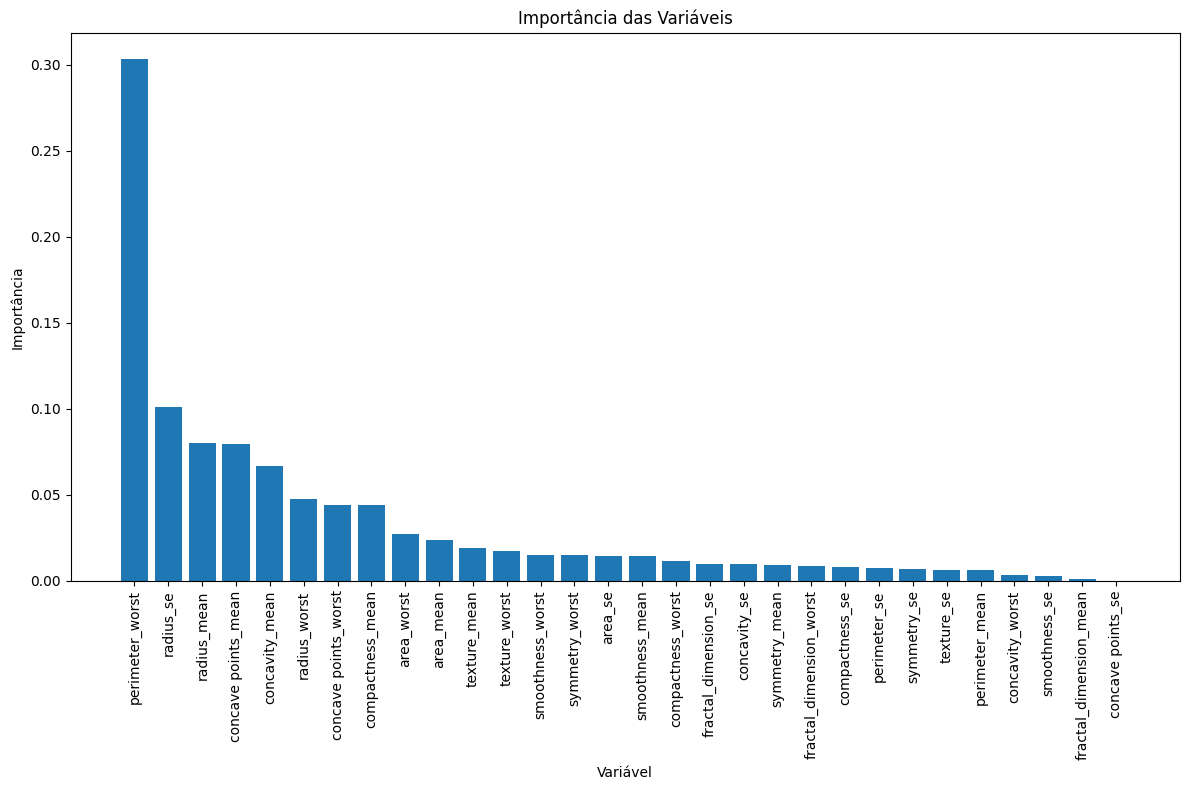

In [14]:
# Agora você pode plotar um gráfico de barras para visualizar as importâncias
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.bar(importance_df['Variável'], importance_df['Importância'])
plt.xticks(rotation=90)
plt.xlabel('Variável')
plt.ylabel('Importância')
plt.title('Importância das Variáveis')
plt.tight_layout()
plt.show()

In [15]:
(importance_df[importance_df['Importância'] > 0.02])['Variável'].values

array(['perimeter_worst', 'radius_se', 'radius_mean',
       'concave points_mean', 'concavity_mean', 'radius_worst',
       'concave points_worst', 'compactness_mean', 'area_worst',
       'area_mean'], dtype=object)

In [16]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
 # Separar as features (X) e a variável de saída (y)
new_X = X[['perimeter_worst', 'radius_se', 'radius_mean', 'concave points_mean', 'concavity_mean', 'radius_worst',
          'concave points_worst', 'compactness_mean', 'area_worst', 'area_mean']]
ney_Y = Y  # Coluna com os diagnósticos (M = maligno, B = benigno)

In [18]:
# Pré-processamento dos dados
scaler = StandardScaler()
new_X = scaler.fit_transform(new_X)

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(new_X, ney_Y, test_size=0.2, random_state=42)

In [19]:
# Criar o modelo da rede neural
model = Sequential()
model.add(Dense(128, input_dim=10, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [20]:
# Compilar o modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
# Treinar o modelo
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
15/15 [==============================] - 2s 31ms/step - loss: 0.4266 - accuracy: 0.9143 - val_loss: 0.2374 - val_accuracy: 0.9737
Epoch 2/50
15/15 [==============================] - 0s 7ms/step - loss: 0.2167 - accuracy: 0.9341 - val_loss: 0.1243 - val_accuracy: 0.9737
Epoch 3/50
15/15 [==============================] - 0s 7ms/step - loss: 0.1665 - accuracy: 0.9385 - val_loss: 0.0873 - val_accuracy: 0.9825
Epoch 4/50
15/15 [==============================] - 0s 11ms/step - loss: 0.1508 - accuracy: 0.9385 - val_loss: 0.0742 - val_accuracy: 0.9737
Epoch 5/50
15/15 [==============================] - 0s 7ms/step - loss: 0.1450 - accuracy: 0.9363 - val_loss: 0.0692 - val_accuracy: 0.9825
Epoch 6/50
15/15 [==============================] - 0s 7ms/step - loss: 0.1390 - accuracy: 0.9407 - val_loss: 0.0670 - val_accuracy: 0.9825
Epoch 7/50
15/15 [==============================] - 0s 7ms/step - loss: 0.1333 - accuracy: 0.9451 - val_loss: 0.0635 - val_accuracy: 0.9825
Epoch 8/50
15/15 [

In [22]:
# Avaliar o modelo no conjunto de testes
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Acurácia no conjunto de testes: {accuracy:.4f}')

4/4 [==============================] - 0s 5ms/step - loss: 0.0743 - accuracy: 0.9649
Acurácia no conjunto de testes: 0.9649


In [42]:
X_test[0]

array([-0.33393537, -0.03274296, -0.47069438, -0.27623152, -0.10984741,
       -0.26903951, -0.19956318,  0.02765051, -0.35629925, -0.49199876])

In [23]:
import networkx as nx

In [36]:
# Calcular a matriz de correlação
correlation_matrix = df.corr()